In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from __future__ import division
import pandas as pd
import requests 
from dotenv import load_dotenv
import os
import json

In [2]:
load_dotenv()

True

In [3]:
quandl_api = os.getenv("quandl_api")

In [4]:
type(quandl_api)

str

In [5]:
url = "https://data.nasdaq.com/api/v3/datasets/LBMA/GOLD"


In [6]:
gold_data = requests.get(url,quandl_api).json()

In [7]:
columns = gold_data["dataset"]["column_names"]

In [8]:
df = pd.DataFrame(gold_data["dataset"]["data"])

In [9]:
df.columns = columns

In [10]:
df = df.set_index("Date")



In [11]:
gold = df["2014-06-01":"2014-01-01"]

In [12]:
ticker = "TIF"

In [13]:
url1= "https://data.nasdaq.com/api/v3/datasets/WIKI/{}".format(ticker)

In [14]:
tif_get = requests.get(url1,quandl_api).json()

In [15]:
columns = tif_get["dataset"]["column_names"]

In [16]:
df = pd.DataFrame(tif_get["dataset"]["data"])

In [17]:
df.columns = columns

In [18]:
df = df.set_index("Date")

In [19]:
one_year = df.loc["2014-06-01":"2014-01-01"]

In [20]:
x_gold_close = gold["USD (AM)"]

In [21]:
y_tif_close = one_year["Close"]

In [22]:
x_gold_close.index = pd.to_datetime(x_gold_close.index,infer_datetime_format=True, format = "%d/%m/%Y")
y_tif_close.index = pd.to_datetime(y_tif_close.index,infer_datetime_format=True, format = "%d/%m/%Y")

In [23]:
display(x_gold_close,y_tif_close)

Date
2014-05-30    1254.00
2014-05-29    1254.00
2014-05-28    1265.25
2014-05-27    1283.00
2014-05-23    1292.00
               ...   
2014-01-08    1226.50
2014-01-07    1237.50
2014-01-06    1238.00
2014-01-03    1232.25
2014-01-02    1219.75
Name: USD (AM), Length: 103, dtype: float64

Date
2014-05-30    99.41
2014-05-29    99.13
2014-05-28    97.78
2014-05-27    97.92
2014-05-23    96.59
              ...  
2014-01-08    91.70
2014-01-07    92.15
2014-01-06    91.64
2014-01-03    92.28
2014-01-02    92.55
Name: Close, Length: 103, dtype: float64

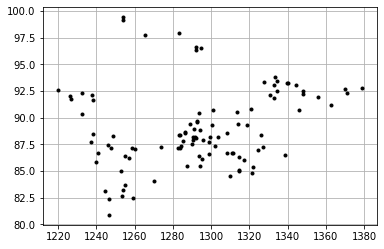

In [24]:
plt.figure()
plt.plot(x_gold_close, y_tif_close, "k.")
plt.grid(True)
plt.show()

In [25]:
model = LinearRegression()

In [26]:
x = x_gold_close.to_numpy()

In [27]:
y = y_tif_close.to_numpy()

In [28]:
x.shape

(103,)

In [29]:
y.shape

(103,)

In [30]:
x = x.reshape(-1, 1)
y = y.reshape(-1,1)

In [31]:
model.fit(x,y)

LinearRegression()

In [46]:
res_sum_of_squares = np.mean((model.predict(x)-y) **2)

In [33]:
x_bar = x.mean()

In [34]:
variance = np.var(x,ddof=1)

In [35]:
variance

1355.6491290691033

In [36]:
cov = np.cov(x.T,y.T)[0][1]

In [37]:
cov

31.53068770226537

In [38]:
beta = cov/variance

In [39]:
beta

0.023258737844590253

In [40]:
x_bar

1292.7305825242718

In [41]:
y_bar = y.mean()

In [42]:
y_bar

89.027572815534

In [47]:
a = y_bar - beta * x_bar

In [50]:
def price(x):
    return a+beta*x

In [57]:
price(1254)

88.1267483500337

In [53]:
x_gold_close

Date
2014-05-30    1254.00
2014-05-29    1254.00
2014-05-28    1265.25
2014-05-27    1283.00
2014-05-23    1292.00
               ...   
2014-01-08    1226.50
2014-01-07    1237.50
2014-01-06    1238.00
2014-01-03    1232.25
2014-01-02    1219.75
Name: USD (AM), Length: 103, dtype: float64

In [56]:
y_tif_close

Date
2014-05-30    99.41
2014-05-29    99.13
2014-05-28    97.78
2014-05-27    97.92
2014-05-23    96.59
              ...  
2014-01-08    91.70
2014-01-07    92.15
2014-01-06    91.64
2014-01-03    92.28
2014-01-02    92.55
Name: Close, Length: 103, dtype: float64